# Supervised Classification of Paediatric Inflammatory Bowel Disease

https://www.nature.com/articles/s41598-017-02606-2.pdf

https://www.nature.com/articles/s41598-017-02606-2

https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-017-02606-2/MediaObjects/41598_2017_2606_MOESM1_ESM.xls

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6382508/





In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm #, datasets

# Cargar el Drive helper y mount
#from google.colab import drive

# Link y Codigo de autorizacion.
#drive.mount('/content/drive_all')

LaboratoryAnalysis = ['Endoscopy','Histology']
TRAIN_data = pd.read_csv('https://raw.githubusercontent.com/avallers/InflammatoryBowelDisease/master/TrainingDATA_IBD.csv', delimiter=',')
TEST_data = pd.read_csv('https://raw.githubusercontent.com/avallers/InflammatoryBowelDisease/master/ValidationDATA_IBD.csv',delimiter=',')
features=pd.read_csv('https://raw.githubusercontent.com/avallers/InflammatoryBowelDisease/master/EH_features_IBD.csv', delimiter=',')

feature_names[0:21]

X = TRAIN_data[feature_names]
y = TRAIN_data['Diagnosis']


In [27]:
feature_names = list(TRAIN_data.iloc[:,1:21])
X = TRAIN_data[feature_names]
y = TRAIN_data['Diagnosis']
print(TRAIN_data['Diagnosis'].unique())
nn=pd.DataFrame({'Crohn_s Disease':[0], 'IBDU': [1], 'Ulcerative Colitis': [2]})
ynn= [nn[t] for t in y]
yn=np.matrix(ynn).flatten()
yn=list(yn.A1)
DF = TRAIN_data[feature_names]
#DF = DF.set_index('Diagnosis')
#DF = DF.set_index('Training set') 
DF.Diagnosis=yn




['Crohn_s Disease' 'IBDU' 'Ulcerative Colitis']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

PCA2=pd.DataFrame(principalComponents,columns=['pca1', 'pca2'])
PCA2['class']=yn

DATAR=PCA2.loc[PCA2['class'] != 1]# excludinng IBDU

XT=DATAR.iloc[:,0:2].values
yT=DATAR.iloc[:,2].values

print(PCA2.head())



       pca1      pca2  class
0  4.154051 -0.514793      0
1  4.172037 -2.423610      0
2 -1.357890  0.800485      0
3  1.724420  1.413814      0
4  2.820094  1.306797      0


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# comparison of classification algorithms
###'MLP 50Hidden_layes',	   'LinearSVC (linear kernel)',	    'SVC with RBF kernel',	    'SVC with polynomial (degree 5) kernel'

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


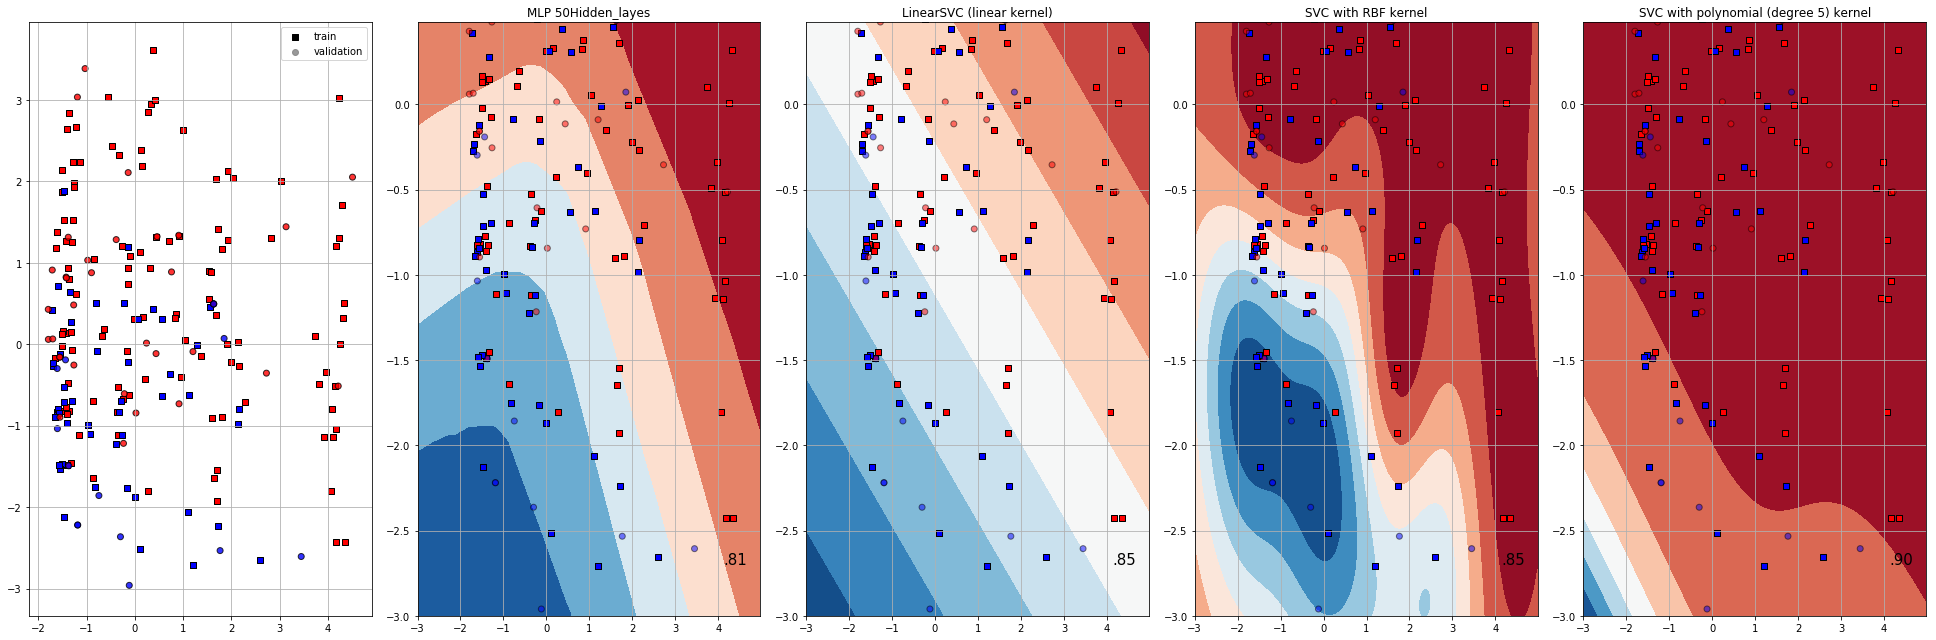

In [0]:


h = .02  # step size in the mesh


C= 1.0  # SVM regularization parameter


names = ['MLP 50Hidden_layes',
	   'LinearSVC (linear kernel)',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 5) kernel']

# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(XT, yT)

# MLP 50
MLPc=MLPClassifier(random_state=0, hidden_layer_sizes=[50], activation='relu', solver='adam')
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(XT, T)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(XT, yT)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=5, C=1000).fit(XT, yT)


#classifiers = [svm.SVC(kernel='linear', C=C),svm.LinearSVC(C=C),svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0,7),svm.SVC(kernel='poly', degree=3, C=C)]

classifiers = [MLPc,lin_svc,rbf_svc,poly_svc]


datasets = [PCAt2]#,[Data_t],[Data_val]]


Xt = TEST_data.iloc[:,1:21].values
yt = TEST_data['Diagnosis']

nn=pd.DataFrame({'Crohn_s Disease':[0], 'IBDU': [1], 'Ulcerative Colitis': [2]})
ynn= [nn[t] for t in yt]
ynt=np.matrix(ynn).flatten()
ynt=list(ynt.A1)
yt = ynt#

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xt)

PCAt2=pd.DataFrame(principalComponents,columns=['pca1', 'pca2'])
PCAt2['class']=ynt
print(PCAt2.head())

cc=pd.DataFrame({'Crohn_s Disease':["r"], 'IBDU': ["g"], 'Ulcerative Colitis': ["b"]})
ycc= [cc[t] for t in TEST_data['Diagnosis']]
yct=np.matrix(ycc).flatten()
yct=list(yct.A1)
#yc

Xdt=PCAt2.iloc[:,0:2].values
ydt=PCAt2.iloc[:,2].values


figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
#for ds_cnt, ds in enumerate(datasets):
# preprocess dataset, split into training and test part
#X, y = ds
#X = StandardScaler().fit_transform(X)
X_train, X_test= np.array(XT),np.array(Xdt)#\        train_test_split(X, y, test_size=.4, random_state=42)
y_train, y_test = np.array(yT),np.array(ydt)
x_min, x_max = -3,5#X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = -3,.5#X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, 1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], marker='s', c=y_c, edgecolors='k', label='train')


# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=yct,   edgecolors='k', alpha=0.8, label='validation')


#ax.set_xlim(xx.min(), xx.max())
#ax.set_ylim(yy.min(), yy.max())
ax.legend()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
leg.legendHandles[1].set_color('grey')
ax.grid()

i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], marker='s', c=y_c,cmap=plt.cm.RdBu,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=yct, cmap=plt.cm.RdBu,
               edgecolors='k', alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.grid()

    #ax.set_xticks(())
    #ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1


plt.tight_layout()
plt.show()


#disambiguation mechanism & Ensemble methods: Soft Voting

Automatically created module for IPython interactive environment


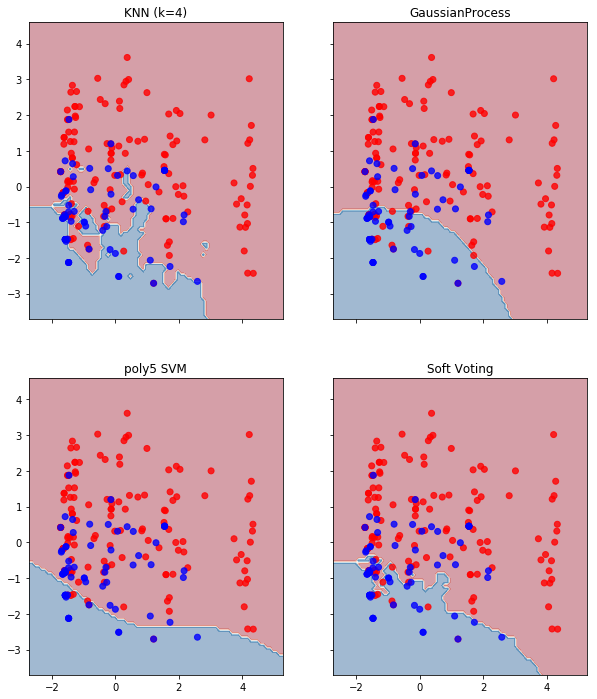

In [0]:
XT=DATAR.iloc[:,0:2].values
yT=DATAR.iloc[:,2].values


y_c= ['red' if nn==0 else 'blue' for nn in yT]
y_c=np.matrix(y_c).flatten()
y_c=list(y_c.A1)



print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB


# Loading some example data

#svm.SVC(kernel='rbf', gamma=0.7, C=C),          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
#SVC(kernel='rbf', probability=True)
# Training classifiers
clf1 = GaussianProcessClassifier(1.0 * RBF(1.0))
clf2 = KNeighborsClassifier(n_neighbors=4)
clf3 = SVC (C=100.0, kernel='poly', degree=5, gamma='auto',probability=True)
        
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[3, 2, 2])
X=XT
y=yT

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


#    plot_contours(ax, clf, xx, yy,cmap=plt.cm.RdBu, alpha=0.8)
#    ax.scatter(X0, X1, c=yc, cmap=plt.cm.RdBu, s=20, edgecolors='k')
  
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(7, 7))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf2, clf1, clf3, eclf],
                        ['KNN (k=4)','GaussianProcess',
                         'poly5 SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.RdBu)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y_c, alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# Metris Confusion Matrix

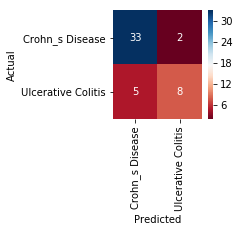

Classification Report
                    precision    recall  f1-score   support

   Crohn_s Disease       0.87      0.94      0.90        35
Ulcerative Colitis       0.80      0.62      0.70        13

          accuracy                           0.85        48
         macro avg       0.83      0.78      0.80        48
      weighted avg       0.85      0.85      0.85        48


accuracy
0.8541666666666666


In [0]:
Xt = TEST_data.iloc[:,1:21].values
yt = TEST_data['Diagnosis']

nn=pd.DataFrame({'Crohn_s Disease':[0], 'IBDU': [1], 'Ulcerative Colitis': [2]})
ynn= [nn[t] for t in yt]
ynt=np.matrix(ynn).flatten()
ynt=list(ynt.A1)
yt = ynt#

X_test=np.array(Xdt)

y_predict=eclf.predict(X_test)
target_names=TEST_data['Diagnosis'].unique()

#yy_predict=[]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(2,2))
sns.heatmap(conf_mat, cmap="RdBu", annot=True, fmt='d',xticklabels=target_names, yticklabels=target_names)
#sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print('Classification Report')
print(classification_report(y_test, y_predict, target_names=target_names))

print('')
print('accuracy')
print(accuracy_score(y_test, y_predict, normalize=True))

# exploration of other configuratios of neural network
# in case all features

In [0]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

import pandas as pd
import numpy as np

# Read data
train = pd.read_csv('https://raw.githubusercontent.com/avallers/InflammatoryBowelDisease/master/TrainingDATA_IBD.csv', delimiter=',')
X_train = (train.iloc[:,1:21].values).astype('float32')


labels = train.iloc[:,21] #.values.astype('int32')
# convert list of labels to binary class matrix
#y_train = np_utils.to_categorical(labels)

nn=pd.DataFrame({'Crohn_s Disease':[0], 'IBDU': [1], 'Ulcerative Colitis': [2]})
ynn= np.matrix([nn[t] for t in labels]).flatten()
y_train=np.array(list(ynn.A1))

feature_names = list(train.iloc[:,1:21])


data_test=pd.read_csv('https://raw.githubusercontent.com/avallers/InflammatoryBowelDisease/master/ValidationDATA_IBD.csv',delimiter=',')
X_test = (data_test.iloc[:,1:21].values).astype('float32')

labels_test = data_test.iloc[:,21] #.values.astype('int32')
ynn= np.matrix([nn[t] for t in labels_test]).flatten()
y_test=np.array(list(ynn.A1))


In [0]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


#20 inputs -> [8 hidden nodes] -> 3 outputs

# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(6, input_dim=5, activation='relu'))
  # Add one hidden layer 
 # model.add(Dense(8, input_dim=8, activation='relu'))
  # Add an output layer
  model.add(Dense(1, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

#Evaluate The Model with k-Fold Cross Validation**

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)


results = cross_val_score(estimator, Xt, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 71.57% (4.37%)


# Extra

## exploration of SVM RBF Kernel  in case of all features

In [0]:

# Read data
train = pd.read_csv('/content/drive_all/My Drive/1S2019/IA006C/IBD/TrainingDATA_IBD.csv', delimiter=',')
X_train = train.iloc[:,1:21]#.values).astype('float32')
y_train = train.iloc[:,21] #.values.astype('int32')

feature_names = list(train.iloc[:,1:21])

data_test=pd.read_csv('/content/drive_all/My Drive/1S2019/IA006C/IBD/ValidationDATA_IBD.csv',delimiter=',')
X_test = data_test.iloc[:,1:21]#.values).astype('float32')
y_test = data_test.iloc[:,21] #.values.astype('int32')



In [0]:
from sklearn.svm import SVC

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 91.21
Accuracy of SVC on test set: 70.83


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
  
    
c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
print( 'the generated array of c values')
print ( c_SVC )
param_grid_S = {'C': c_SVC}



print("\n Array of means \n")
clf = GridSearchCV(clf_SVC, param_grid =param_grid_S, cv=20 , scoring='accuracy')
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print(means)

y_true, y_pred = y_test, clf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))

the generated array of c values
[1.00000000e+00 1.07252413e+00 1.15030800e+00 1.23373308e+00
 1.32320850e+00 1.41917304e+00 1.52209732e+00 1.63248610e+00
 1.75088073e+00 1.87786182e+00 2.01405211e+00 2.16011948e+00
 2.31678026e+00 2.48480272e+00 2.66501086e+00 2.85828845e+00
 3.06558332e+00 3.28791207e+00 3.52636502e+00 3.78211156e+00
 4.05640590e+00 4.35059319e+00 4.66611616e+00 5.00452215e+00
 5.36747075e+00 5.75674188e+00 6.17424455e+00 6.62202624e+00
 7.10228290e+00 7.61736977e+00 8.16981285e+00 8.76232139e+00
 9.39780109e+00 1.00793684e+01 1.08103658e+01 1.15943781e+01
 1.24352503e+01 1.33371059e+01 1.43043679e+01 1.53417796e+01
 1.64544288e+01 1.76477719e+01 1.89276611e+01 2.03003732e+01
 2.17726400e+01 2.33516817e+01 2.50452420e+01 2.68616263e+01
 2.88097423e+01 3.08991436e+01 3.31400770e+01 3.55435321e+01
 3.81212958e+01 4.08860094e+01 4.38512315e+01 4.70315038e+01
 5.04424225e+01 5.41007151e+01 5.80243221e+01 6.22324854e+01
 6.67458420e+01 7.15865259e+01 7.67782761e+01 8.23465

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

